In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.4 (default, Sep 11 2019, 10:56:41) 
[GCC 7.4.0]
TensorFlow version :  1.14.0
Keras version :  2.2.5


In [18]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

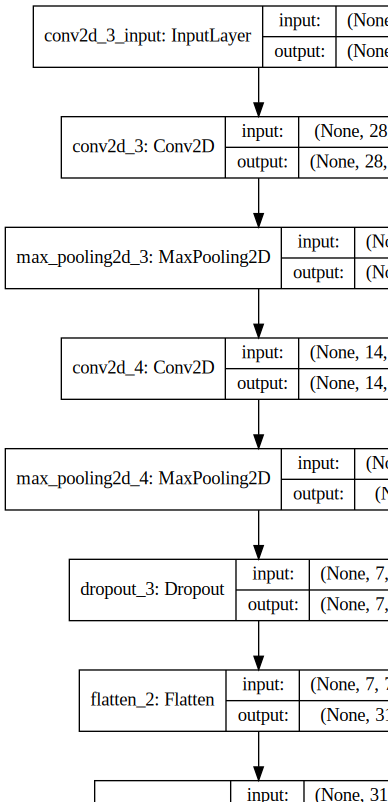

In [20]:
from IPython.display import SVG
from IPython.display import HTML
import base64
_html_template='<img width="{}" src="data:image/svg+xml;base64,{}" >'

def svg_to_fixed_width_html_image(svg, width="100%"):
    text = _html_template.format(width, base64.b64encode(svg))
    return HTML(text)

from keras.utils.vis_utils import model_to_dot
%matplotlib inline

m_dot = model_to_dot(model, show_shapes=True)
m_dot.set_size('20x8')
svg = m_dot.create(prog='dot', format='svg')
SVG(svg)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 42s 698us/step - loss: 0.1896 - acc: 0.9412 - val_loss: 0.0540 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 42s 697us/step - loss: 0.0621 - acc: 0.9810 - val_loss: 0.0349 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0464 - acc: 0.9860 - val_loss: 0.0270 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 47s 787us/step - loss: 0.0374 - acc: 0.9885 - val_loss: 0.0264 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 48s 802us/step - loss: 0.0314 - acc: 0.9905 - val_loss: 0.0242 - val_acc: 0.9918
Epoch 6/12
60000/60000 [==============================] - 46s 760us/step - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0238 - val_acc: 0.9923
Epoch 7/12
60000/600

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022220518111723823
Test accuracy: 0.9924
